In [1]:
import glob
import os

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

from oudelaar_tiled_capture_2019 import config

In [3]:
all_expts = pd.read_csv(config.in_data_raw('rna-fish/rna-fish-scoring.csv'))

In [10]:
all_expts.head()

,shuffled_index,original_index,original_name,shuffled_name,expt_no,sample_type,Image_number,Total_cells,Positive_cells,Notes
0,0,38,images/S0_CD71_low_01_27_R3D.dv,images/0.dv,10,S0_CD71_low,0,6,0,NaN
1,1,201,images/S1_01_23_R3D.dv,images/1.dv,10,S1,1,2,0,NaN
2,2,224,images/S1_20170531_exp008_collect_01_11_R3D.dv,images/2.dv,8,S1,2,2,0,NaN
3,3,116,images/S0_low_20170531_exp008_collect_01_40_R3...,images/3.dv,8,S0_CD71_low,3,1,0,NaN
4,4,267,images/ter119_nosec_control_01_04_R3D.dv,images/4.dv,10,No_primary,4,10,1,NaN


In [4]:
agg_by_expt = all_expts.groupby(['expt_no', 'sample_type'])[['Total_cells', 'Positive_cells']].sum()

In [5]:
agg_by_expt['percent_positive'] = 100 * agg_by_expt.Positive_cells / agg_by_expt.Total_cells

In [6]:
agg_by_expt = agg_by_expt.reset_index()

In [7]:
print(
    stats.ttest_rel(
        agg_by_expt.loc[agg_by_expt.sample_type == 'S0_CD71_low', 'percent_positive'],
        agg_by_expt.loc[agg_by_expt.sample_type == 'S0_CD71_medium', 'percent_positive']))
print(
    stats.ttest_rel(
        agg_by_expt.loc[agg_by_expt.sample_type == 'S0_CD71_low', 'percent_positive'],
        agg_by_expt.loc[agg_by_expt.sample_type == 'S1', 'percent_positive']))

Ttest_relResult(statistic=-4.809790931402929, pvalue=0.04061123884279761)
Ttest_relResult(statistic=-21.20079024621823, pvalue=0.002217427886442946)


In [8]:
agg_by_sample = agg_by_expt.groupby('sample_type')
mean_by_sample = agg_by_sample.percent_positive.mean()
std_by_sample = agg_by_sample.percent_positive.std()

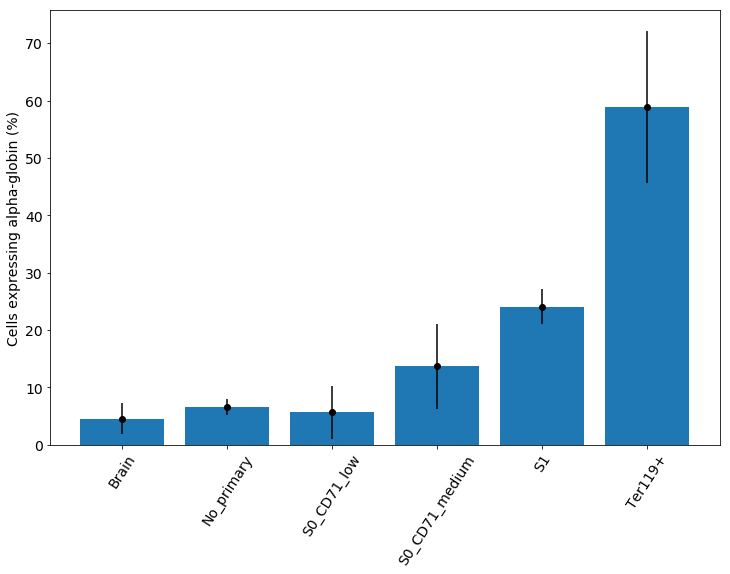

In [9]:
plt.figure(figsize=(12,8))

plt.rcParams['font.size'] = 14

plt.bar(range(6), mean_by_sample)
plt.errorbar(range(6), mean_by_sample, std_by_sample, fmt='o', color='black')
plt.xticks(range(6), mean_by_sample.index, rotation=57)

plt.ylabel('Cells expressing alpha-globin (%)')
plt.savefig('../../out/figures/FISH_results.eps')